In [9]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

In [21]:
bina=ldata("tc01_data/yeast_Y2H.txt")
lit=ldata("tc01_data/yeast_LIT.txt")
prot=ldata("tc01_data/yeast_AP-MS.txt")

In [22]:
P=nx.Graph()
P.add_edges_from(prot)
B=nx.Graph()
B.add_edges_from(bina)
L=nx.Graph()
L.add_edges_from(lit)

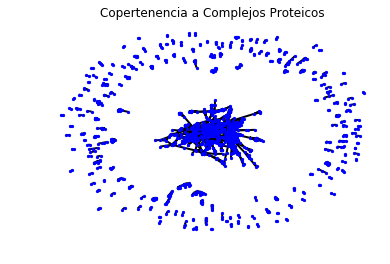

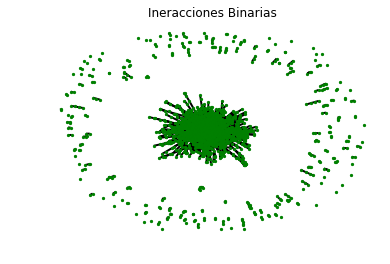

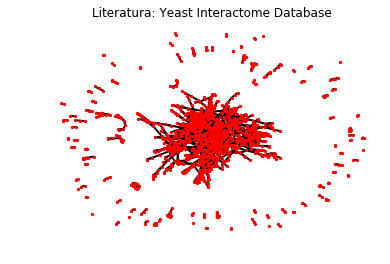

In [23]:

plt.figure(1)
plt.title("Copertenencia a Complejos Proteicos")
nx.draw(P, with_labels=False, node_color="blue", node_size=5, width=2)

plt.figure(2)
plt.title("Ineracciones Binarias")
nx.draw(B, with_labels=False,node_color="green", node_size=5, width=2)

plt.figure(3)
plt.title("Literatura: Yeast Interactome Database")
nx.draw(L, with_labels=False,node_color="red", node_size=5, width=2)


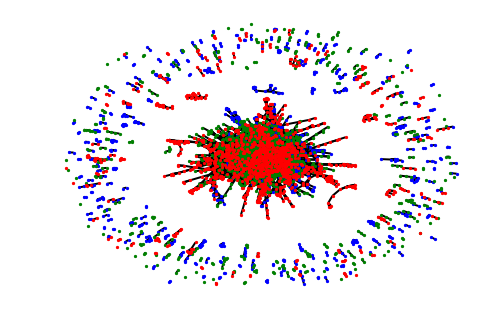

In [24]:
plt.figure(4)

P=nx.Graph()
P.add_edges_from(prot)
nx.draw(P, with_labels=False, node_color="blue", node_size=5, width=2)

B=nx.Graph()
B.add_edges_from(bina)
nx.draw(B, with_labels=False,node_color="green", node_size=5, width=2)

L=nx.Graph()
L.add_edges_from(lit)
nx.draw(L, with_labels=False,node_color="red", node_size=5, width=2)

In [27]:
G=[B,P,L]

In [49]:
N=np.empty_like(G) #crea un vector vacio de dimension igual a G
L=np.empty_like(G)
D_mean=np.empty_like(G)
D_min=np.empty_like(G)
D_max=np.empty_like(G)
dens=np.empty_like(G)
clust_mean=np.empty_like(G)
clust_delta=np.empty_like(G)
diam=np.empty_like(G)

for i in range(0,len(G)):
    N[i]=G[i].number_of_nodes()
    L[i]=G[i].number_of_edges()
    D_mean[i]=np.mean(G[i].degree().values())
    D_min[i]=np.min(G[i].degree.values())
    D_max[i]=np.max(G[i].degree.values())
    

AttributeError: 'DegreeView' object has no attribute 'values'

In [60]:
Q=[(1,2),(3,4),(5,6)]

In [62]:
[i for (i,j) in Q]

[1, 3, 5]